### Initial Loader Test

In [1]:
from random import shuffle
from Dataset import VideoDataset
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from matplotlib import patches
path='/home/nfs/inf6/data/datasets/MOVi/movi_c/'


number_of_frames_per_video=24
max_objects_in_scene=11
video_dataset=VideoDataset(path,split='validation',number_of_frames_per_video=number_of_frames_per_video,max_objects_in_scene=max_objects_in_scene,halve_dataset=True) # to load validation set
print("number of movies: ",len(video_dataset))
video_loader = DataLoader(dataset=video_dataset,
                            batch_size=60,
                            shuffle=False)
%load_ext autoreload
%autoreload 2

number of movies:  125


shapes: 
coms.shape=torch.Size([60, 24, 11, 2]),
bboxes.shape=torch.Size([60, 24, 11, 4]),
masks.shape=torch.Size([60, 24, 128, 128]),
rgbs.shape=torch.Size([60, 24, 3, 128, 128]),
flows.shape=torch.Size([60, 24, 3, 128, 128])


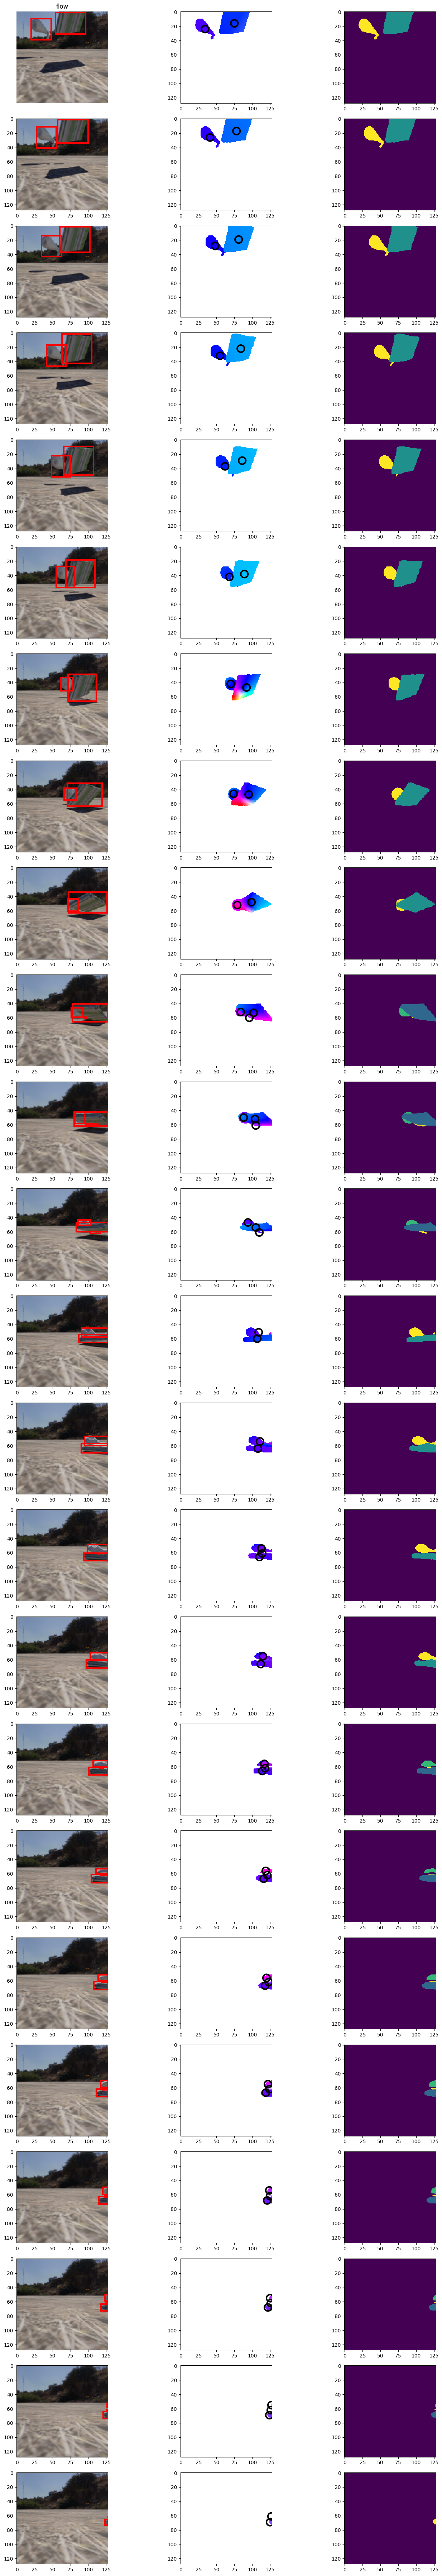

In [2]:
fistVideo=True
iterator=iter(video_loader)
coms,bboxes,masks,rgbs,flows=next(iterator)
print(f"shapes: \r\n{coms.shape=},\r\n{bboxes.shape=},\r\n{masks.shape=},\r\n{rgbs.shape=},\r\n{flows.shape=}\r\n============================================")

fig, ax = plt.subplots(number_of_frames_per_video, 3, figsize=(15, 24*3 ))

for i in range (number_of_frames_per_video):
    if i==0:
        ax[i,0].axis("off")
        ax[i,0].set_title("flow")

    ax[i,0].imshow((rgbs[0,i]).clamp(0, 255).permute(1,2,0).byte().numpy())
    for (x_left,y_left, x_right,y_right) in bboxes[0,i]:
        if x_left<0: continue # it means there is no bbox.
        rect = patches.Rectangle(
            (x_left, y_left),  # (x, y) coordinates of top-left corner
            x_right-x_left,        # Width
            y_right-y_left,       # Height
            linewidth=3,       # Line thickness
            edgecolor='red',   # Border color
            facecolor='none'   # No fill
        )
        ax[i, 0].add_patch(rect)
    ax[i,1].imshow((flows[0,i]).clamp(0, 255).permute(1,2,0).byte().numpy())
    for (x,y) in coms[0,i]:
        if x<0: continue # it means there is no bbox.
        circle = patches.Circle(
            (x,y),  # (x, y) coordinates of top-left corner
            radius=5,
            linewidth=3,       # Line thickness
            edgecolor='black',   # Border color
            facecolor='none'   # No fill
        )
        ax[i, 1].add_patch(circle)
    
    ax[i,2].imshow((masks[0,i]).clamp(0, 255).byte().numpy())

plt.tight_layout()
plt.show()

In [ ]:
test_dataset=VideoDataset(path,split='validation',number_of_frames_per_video=number_of_frames_per_video,max_objects_in_scene=max_objects_in_scene,halve_dataset=True,is_test_dataset=True) # to load validation set
print("number of movies: ",len(video_dataset))
test_loader = DataLoader(dataset=test_dataset,
                            batch_size=60,
                            shuffle=False)

iterator=iter(test_loader)
coms,bboxes,masks,rgbs,flows=next(iterator)
print(f"shapes: \r\n{coms.shape=},\r\n{bboxes.shape=},\r\n{masks.shape=},\r\n{rgbs.shape=},\r\n{flows.shape=}\r\n============================================")

fig, ax = plt.subplots(number_of_frames_per_video, 3, figsize=(15, 24*3 ))

for i in range (number_of_frames_per_video):
    if i==0:
        ax[i,0].axis("off")
        ax[i,0].set_title("flow")

    ax[i,0].imshow((rgbs[0,i]).clamp(0, 255).permute(1,2,0).byte().numpy())
    for (x_left,y_left, x_right,y_right) in bboxes[0,i]:
        if x_left<0: continue # it means there is no bbox.
        rect = patches.Rectangle(
            (x_left, y_left),  # (x, y) coordinates of top-left corner
            x_right-x_left,        # Width
            y_right-y_left,       # Height
            linewidth=3,       # Line thickness
            edgecolor='red',   # Border color
            facecolor='none'   # No fill
        )
        ax[i, 0].add_patch(rect)
    ax[i,1].imshow((flows[0,i]).clamp(0, 255).permute(1,2,0).byte().numpy())
    for (x,y) in coms[0,i]:
        if x<0: continue # it means there is no bbox.
        circle = patches.Circle(
            (x,y),  # (x, y) coordinates of top-left corner
            radius=5,
            linewidth=3,       # Line thickness
            edgecolor='black',   # Border color
            facecolor='none'   # No fill
        )
        ax[i, 1].add_patch(circle)
    
    ax[i,2].imshow((masks[0,i]).clamp(0, 255).byte().numpy())

plt.tight_layout()
plt.show()